## Variables Aleatorias

### Imports 

Link Google colab:

* [Variables Aleatorias](https://colab.research.google.com/drive/1_e5V5qV70xr1S-M_db8saCJLjGll-mkl?usp=sharing)


In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

### Generación de números pseudoaleatorios.


${z}_{i+1} = ( a {z}_{i} + c ) \text{ mod m}$

In [2]:

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# setear el valor de la semilla
rng.current = 1


In [3]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

### Método de transformada inversa

In [4]:

def expon_pdf(x, lmabd=1):
    """fdp de distribución exponencial."""
    return lmabd*np.exp(-lmabd*x)

In [5]:
def expon_cdf(x, lambd=1):
    """FDA de distribución exponencial."""
    return 1 - np.exp(-lambd*x)

In [6]:
def expon_icdf(p, lambd=1):
    """Inversa FDA de distribución exponencial - función cuantil."""
    return -np.log(1-p)/lambd

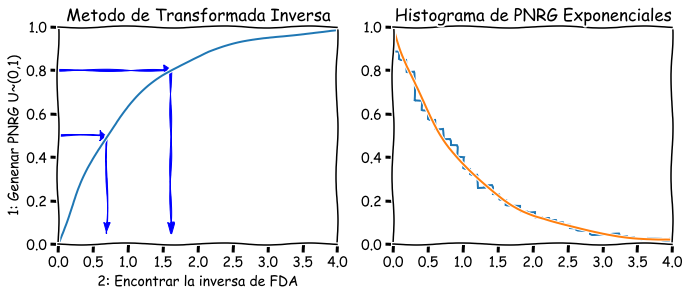

In [7]:
dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(11,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Genenar PNRG U~(0,1)')
    plt.xlabel('2: Encontrar la inversa de FDA')
    plt.title('Metodo de Transformada Inversa')

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histograma de PNRG Exponenciales')

### Distribución empírica - Interpolación lineal

(array([0.00241719, 0.        , 0.00483439, 0.00241719, 0.03142353,
        0.0459267 , 0.09668779, 0.12085974, 0.17887241, 0.2272163 ,
        0.19095838, 0.14503168, 0.10393937, 0.03867512, 0.0435095 ,
        0.09668779, 0.10152218, 0.15470046, 0.19095838, 0.19579277,
        0.14503168, 0.14986607, 0.0918534 , 0.03625792, 0.02175475]),
 array([-3.87958229, -3.46587958, -3.05217688, -2.63847417, -2.22477146,
        -1.81106875, -1.39736604, -0.98366333, -0.56996062, -0.15625792,
         0.25744479,  0.6711475 ,  1.08485021,  1.49855292,  1.91225563,
         2.32595834,  2.73966104,  3.15336375,  3.56706646,  3.98076917,
         4.39447188,  4.80817459,  5.2218773 ,  5.63558   ,  6.04928271,
         6.46298542]),
 [<matplotlib.patches.Polygon at 0x1b06aa4fd30>])

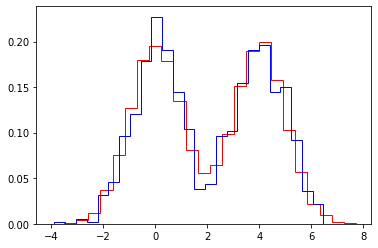

In [8]:
from scipy.interpolate import interp1d
from statsmodels.distributions.empirical_distribution import ECDF

# Genear algunos datos aleatorios
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

ecdf = ECDF(x)
inv_cdf = interp1d(ecdf.y, ecdf.x, bounds_error=False, assume_sorted=True)
r = np.random.uniform(0, 1, 1000)
ys = inv_cdf(r)

plt.hist(x, 25, histtype='step', color='red', density=True, linewidth=1)
plt.hist(ys, 25, histtype='step', color='blue', density=True, linewidth=1)

Asumiendo que hay bibliotecas de generacion de numeros pseudoaleatorios.
Se pueden usar numpy.random o scipy.stats. Ambas usan algoritmos basados en Mersenne Twister.
La version numpy solo genera numeros, mientras que scipy tiene funciones utiles relacionadas con la distribucion, (PDF, CDF, cuantiles)

Numpy

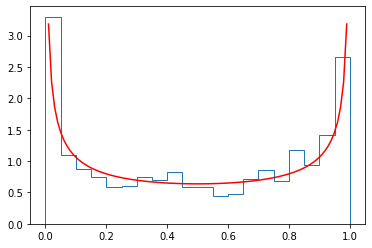

In [9]:
import numpy.random as rng

# Histogram of beta distribution
rs = rng.beta(a=0.5, b=0.5, size=1000)
plt.hist(rs, bins=20, histtype='step', density=True, linewidth=1)

# PDF for the beta distribution
xs = np.linspace(0, 1, 100)
plt.plot(xs, stats.beta.pdf(xs, a=0.5, b=0.5), color='red')
pass

Stats

In [ ]:
# Using scipy

n = 5
xs = [0.1, 0.5, 0.9]
rv = stats.beta(a=0.5, b=0.5)

print(rv.pdf(xs)) # equivalent of dbeta
print(rv.cdf(xs)) # equivalent of pbeta
print(rv.ppf(xs)) # equvialent of qbeta
print(rv.rvs(n)) # equivalent of rbeta